## BDT training

In [1]:
import glob
import pandas as pd
import numpy as np
import importlib

In [2]:
BASE_DIR = "/eos/user/l/llayer/cmsopen/columnar/syst_variation/"
SAMPLES_DIR = BASE_DIR + "samples"
CAND_DIR = BASE_DIR + "cand"

In [3]:
files = glob.glob( CAND_DIR + "/*.h5")
print()

In [4]:
#files = glob.glob( CAND_DIR + "/*.h5")
samples = {}
for sample in ["Data", "QCD", "TTJets_centJER_signal", "TTJets_centJER_bkg", "STJets_centJER", "WZJets_centJER"]:
    #sample_name = sample.split("/")[-1][:-3]
    #print(sample_name)
    samples[sample] = pd.read_hdf(CAND_DIR + "/" + sample + ".h5")

In [6]:
import ml

Welcome to JupyROOT 6.20/06


Set random state
Prepare training data
['Jet_pt', 'Jet_px', 'Jet_py', 'Jet_pz', 'Jet_e', 'Jet_eta', 'Jet_phi', 'Jet_mass', 'Jet_csvDisc', 'Jet_flavour', 'Tau_pt', 'Tau_px', 'Tau_py', 'Tau_pz', 'Tau_e', 'Tau_eta', 'Tau_phi', 'Tau_mass', 'Tau_charge', 'MET_pt', 'MET_px', 'MET_py', 'MET_pz', 'MET_e', 'MET_met', 'event', 'run', 'luminosityBlock', 'HLT_QuadJet40_IsoPFTau40', 'HLT_QuadJet45_IsoPFTau45', 'genEvent_tmeme', 'nJets', 'Jet_nbtags', 'ht', 'aplanarity', 'sphericity', 'chargeEta', 'met', 'deltaPhiTauMet', 'mt', 'mTauJet', 'Jet_btagSF', 'Jet_btagSF_up', 'Jet_btagSF_down', 'Jet_beff', 'Jet_btag_weight1', 'Jet_btag_weight1_up', 'Jet_btag_weight1_down', 'trigger_weight', 'trigger_weight_up', 'trigger_weight_down', 'norm', 'norm_up', 'norm_down', 'pdf', 'pdf_up', 'pdf_down', 'train_flag', 'label', 'bdt', 'weight']


/eos/home-l/llayer/cmsopen/columnar/ml.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  signal_train["weights"] = signal_train['trigger_weight'] * signal_train['Jet_btag_weight1']
/eos/home-l/llayer/cmsopen/columnar/ml.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  signal_train["weights"] = signal_train["weights"] * (1. / np.mean(signal_train["weights"]))
/eos/home-l/llayer/cmsopen/columnar/ml.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

Train model


/cvmfs/sft.cern.ch/lcg/views/LCG_97apython3/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/cvmfs/sft.cern.ch/lcg/views/LCG_97apython3/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


Predicting...


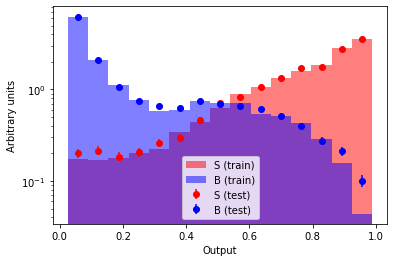

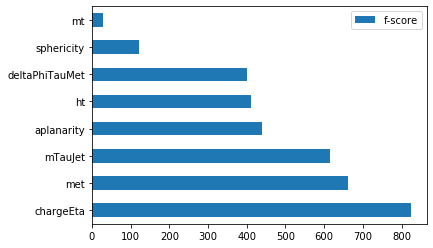

In [95]:
importlib.reload(ml)
ml.train(samples, ".", n_sig=5000, n_bkg=5000, ntrees=500, lr=0.01, random_state=5)

In [96]:
import plot

In [109]:
variables = [
    {"var_name" : "bdt", "bins" : 20, "xlow" : 0., "xup" : 1., "xtitle" : "bdt"}
]

In [110]:
importlib.reload(plot)
plot.vars_to_histos(samples, variables, "histos.root", syst=False)

Data bdt None
QCD bdt None
Change name
TTJets_signal_centJER
TTJets_signal_centJER bdt None
1.1289597074419189 347.1658808435189 347.16588084351895
Change name
TTJets_bkg_centJER
TTJets_bkg_centJER bdt None
STJets_centJER bdt None
WZJets_centJER bdt None


In [111]:
import ROOT

In [112]:
f = ROOT.TFile("histos.root")
f.ls()

TFile**		histos.root	
 TFile*		histos.root	
  KEY: TH1D	Data_bdt;1	Data_bdt
  KEY: TH1D	QCD_bdt;1	QCD_bdt
  KEY: TH1D	TTJets_signal_centJER_bdt;1	TTJets_signal_centJER_bdt
  KEY: TH1D	TTJets_bkg_centJER_bdt;1	TTJets_bkg_centJER_bdt
  KEY: TH1D	STJets_centJER_bdt;1	STJets_centJER_bdt
  KEY: TH1D	WZJets_centJER_bdt;1	WZJets_centJER_bdt


In [113]:
import fit

In [114]:
sample_names = ["Data", "TTJets_bkg", "WZJets", "STJets", "QCD", "TTJets_signal"]
sf_tt_sig, sf_qcd = fit.fit("histos.root", sample_names, "bdt", corr="centJER")
sfs = {}
sfs["TTJets_signal"] = sf_tt_sig
sfs["QCD"] = sf_qcd

Data_bdt
Data 3343.0
TTJets_bkg_centJER_bdt
TTJets_bkg 143.36512967476312
WZJets_centJER_bdt
WZJets 63.73465056276217
STJets_centJER_bdt
STJets 30.224785537131968
QCD_bdt
QCD 2385.7977985453667
TTJets_signal_centJER_bdt
TTJets_signal 347.1658808435189
scale factor TTbar tau(h) QQ  0.9342081532189455 +- 0.07720644156498783
scale factor MultiJet  1.165794619945451 +- 0.011234582540500653
[#1] INFO:DataHandling -- RooDataHist::adjustBinning(signal): fit range of variable x expanded to nearest bin boundaries: [0,350] --> [0,1]
[#0] WARNING:InputArguments -- RooAbsPdf::fitTo(pdf) WARNING: a likelihood fit is requested of what appears to be weighted data.
       While the estimated values of the parameters will always be calculated taking the weights into account,
       there are multiple ways to estimate the errors of the parameters. You are advised to make an 
       explicit choice for the error calculation:
           - Either provide SumW2Error(true), to calculate a sum-of-weights-corr

Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
